In [91]:
import numpy as np
import pandas as pd
import os
import scipy.stats as st
from sklearn.cluster import KMeans

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

from matplotlib import pyplot as plt

from collections import Counter

import copy

from scipy.spatial import Voronoi, voronoi_plot_2d

In [14]:
data = np.load("defective_data/synthetic-data-r-0.05-0.npz")
ground_truth = data["gt"]

In [15]:
ground_truth

array([[6.600e+02, 1.506e+04, 1.000e+00],
       [4.930e+03, 1.633e+04, 1.000e+00],
       [5.230e+03, 1.541e+04, 1.000e+00],
       ...,
       [1.055e+04, 1.442e+04, 1.000e+00],
       [1.082e+04, 1.414e+04, 1.000e+00],
       [1.106e+04, 1.386e+04, 1.000e+00]])

In [16]:
ground_truth.shape

(1213, 3)

In [92]:
gt_locs = ground_truth[:,:2]

In [93]:
vor = Voronoi(gt_locs)

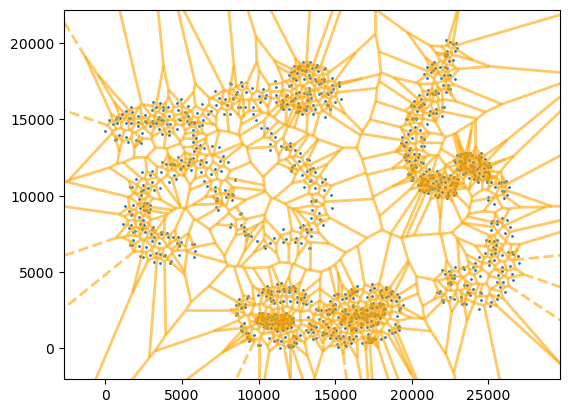

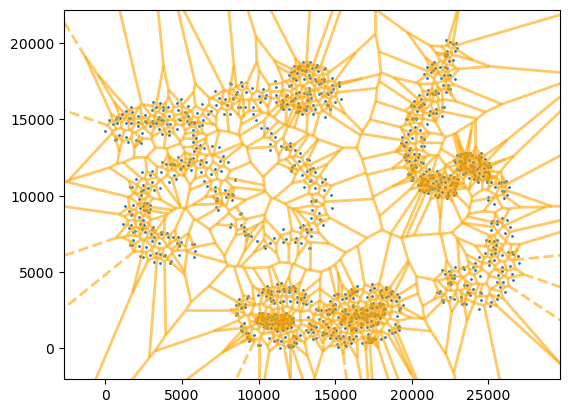

In [94]:
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

In [99]:
def get_sticc_result(ground_truth, filename, title='STICC'):
    pred_labels = pd.read_table(filename, names=["group"])
    
    return adjusted_rand_score(pred_labels.group, ground_truth[:,2]), normalized_mutual_info_score(pred_labels.group, ground_truth[:,2])

In [6]:
def batch_experiment_clean_kmeans(rate):
    for i in range(10):
        data = np.load("defective_data/synthetic-data-r-{}-{:d}.npz".format(rate, i))
        ground_truth = data["gt"]
        features = data["clean"]
        kmeans = KMeans(n_clusters=7, n_init=300).fit(features)
        ari, nmi = adjusted_rand_score(kmeans.labels_, ground_truth[:,2]), normalized_mutual_info_score(kmeans.labels_, ground_truth[:,2])
        print(ari, nmi)
        markersize = 10
        plt.axis("off")
        plt.scatter(ground_truth[:,0], ground_truth[:,1], label=kmeans.labels_, c=kmeans.labels_, cmap="Set1", s=markersize)
        plt.show()

In [98]:
def compute_error(true_labels, pred_labels):
    tmp = np.ones_like(true_labels)
    for i in range(1,8):
        #print(i)
        idx = np.where(true_labels==i)
        pred_lab = pred_labels[idx].flatten().tolist()
        tid = Counter(pred_lab).most_common()[0][0]
        tidx = (true_labels==i) & (pred_labels==tid)
        #print(tidx)
        #print(len(np.where(tidx == True)[0]))
        tmp[tidx] = 0
    return tmp

0.9281897065701575 0.9182515882438357


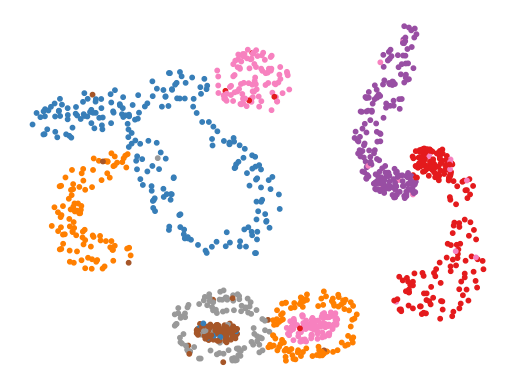

0.9422986789844362 0.9376645195742815


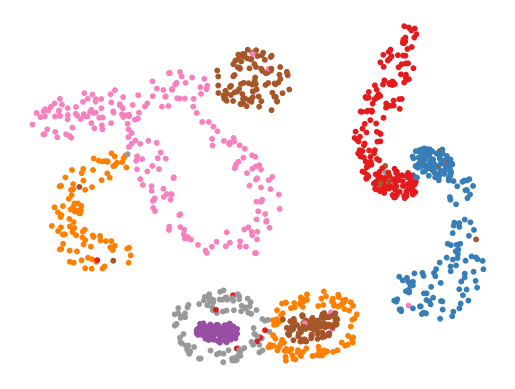

0.9553741114011692 0.9431795789943621


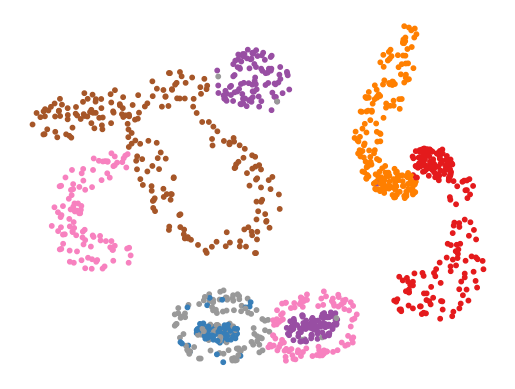

0.9633803693106929 0.9564888675050256


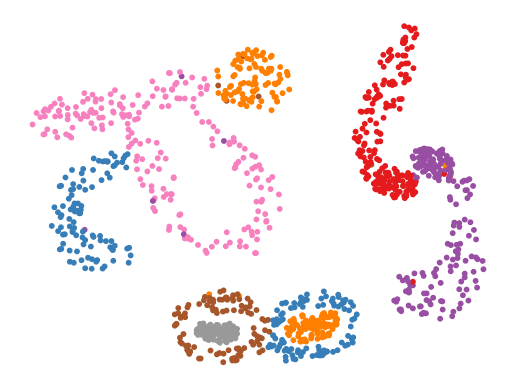

0.9858909863946488 0.979837121189262


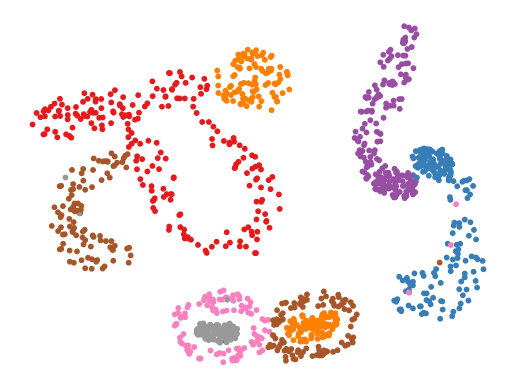

0.9657594399847401 0.9645653261304896


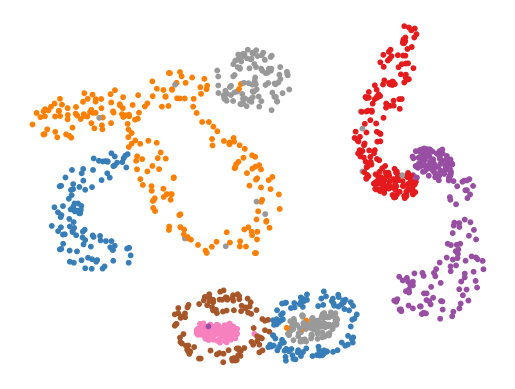

0.9508626531025464 0.9536108893110788


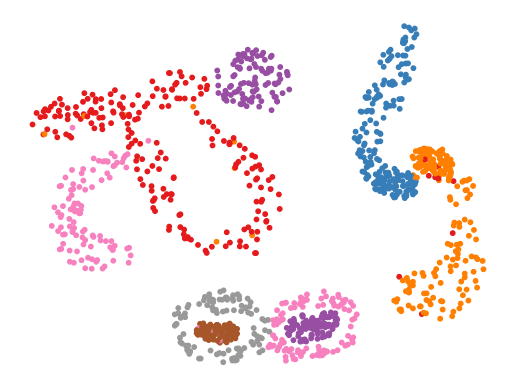

0.8256386610055514 0.8592569205655005


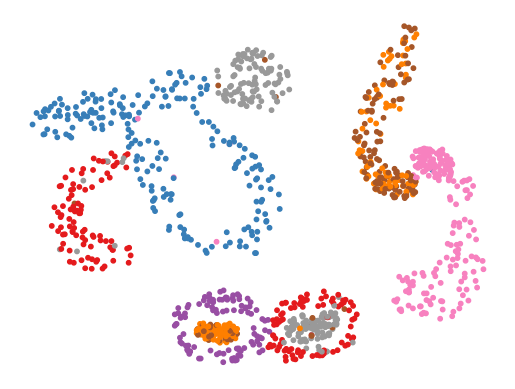

0.7773380975202585 0.8156783754426091


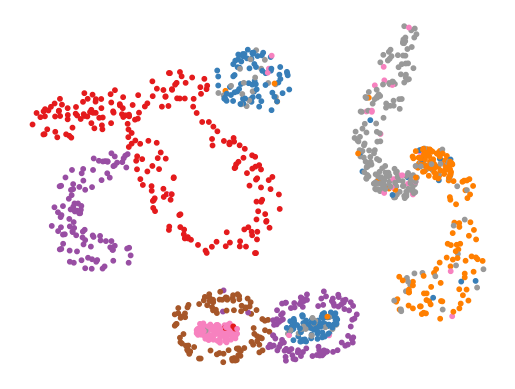

0.9576689756604368 0.9546537547710443


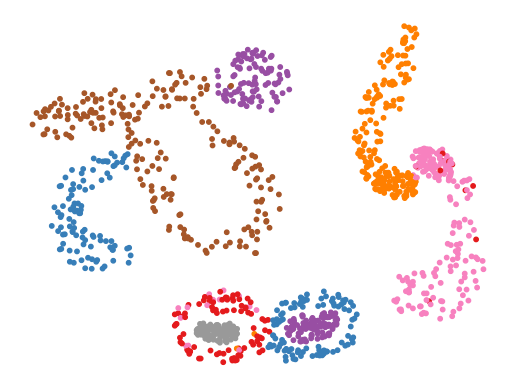

In [8]:
batch_experiment_clean_kmeans("0.05")

In [116]:
def draw_results(tmp, sizes):
    #pred_labels = pd.read_table(filename, names=["group"]).values.flatten()
    bsize = 1
    fsize = 50
    
    balpha = 0.5
    falpha = 0.5
    
    plt.figure()
    plt.axis("off")

    cdict = {0: 'grey', 1: 'red'}
    ldict = {0: 'correct', 1: 'wrong'}
    adict = {0: 0.3, 1: 1.0}

    print(tmp)

    # i = 0
    # idx = np.where(tmp == 0)
    # plt.scatter(ground_truth[idx,0], ground_truth[idx,1], label=ldict[i], 
    #                 # c=cdict[i], alpha=balpha + falpha*sizes[idx], s=bsize + fsize*sizes[idx])
    #                 c="grey", s=1)

    # i = 1
    # idx = np.where(tmp == 1)
    # plt.scatter(ground_truth[idx,0], ground_truth[idx,1], label=ldict[i], 
    #                 # c=cdict[i], alpha=balpha + falpha*sizes[idx], s=bsize + fsize*sizes[idx])
    #                 c=i * (falpha*sizes[idx]), 
    #             s=i*(bsize + fsize*sizes[idx]), 
    #             cmap="RdYlGn_r")

    plt.tricontour(ground_truth[:,0], ground_truth[:,1], sizes)
    
    #plt.legend()
    plt.colorbar()
    plt.show()

In [111]:
ground_truth[:,1].shape

(1213,)

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/stable-sticc/lib/python3.11/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
    
KeyboardInterrupt: 


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), array([ 25, 124, 247, 323, 266, 152,  57,  13,   4,   2]))
[1. 1. 1. ... 1. 1. 1.]


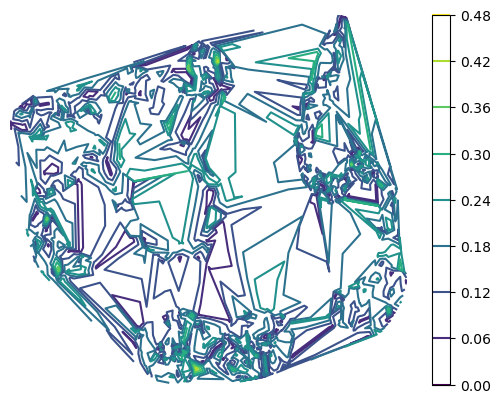

In [113]:
tmp = np.zeros_like(ground_truth[:,2])
for i in range(10):
    data = np.load("defective_data/synthetic-data-r-{}-{:d}.npz".format("0.30", i))
    ground_truth = data["gt"]
    features = data["ood"]
    kmeans = KMeans(n_clusters=7, n_init=300).fit(features)
    tmp += compute_error(ground_truth[:,2], kmeans.labels_)

tmp /= 10

print(np.unique(tmp, return_counts=True))

sizes = copy.deepcopy(tmp)
tmp[tmp>0] = 1

draw_results(tmp, sizes)

[0.3 0.2 0.2 ... 0.8 0.8 0.8]
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1. ]), array([440, 399, 208,  28,  92,  17,   1,  12,  11,   5]))
[1. 1. 1. ... 1. 1. 1.]


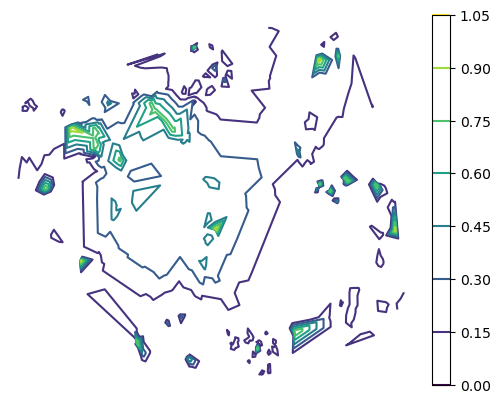

In [117]:
rate = "0.30"
tmp = np.zeros_like(ground_truth[:,2])
for i in range(10):
    filename = "results/result-synthetic-data-ood-glasso-{}-{}.txt".format(rate, i)
    pred_labels = pd.read_table(filename, names=["group"]).values.flatten()
    tmp += compute_error(ground_truth[:,2], pred_labels)

tmp /= 10

print(tmp)

print(np.unique(tmp, return_counts=True))

sizes = copy.deepcopy(tmp)
tmp[tmp>0] = 1

draw_results(tmp, sizes)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1. ]), array([1046,  113,   27,    4,    4,    2,    1,    1,    3,   12]))


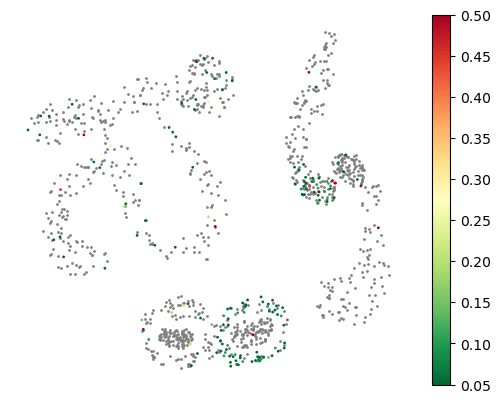

In [45]:
interp, rate = "localmean", "0.30"
tmp = np.zeros_like(ground_truth[:,2])
for i in range(10):
    filename = "results/result-synthetic-data-ood-stable-static-{}-{}-{}.txt".format(interp, rate, i)
    pred_labels = pd.read_table(filename, names=["group"]).values.flatten()
    tmp += compute_error(ground_truth[:,2], pred_labels)

tmp /= 10

print(np.unique(tmp, return_counts=True))

sizes = copy.deepcopy(tmp)
tmp[tmp>0] = 1

draw_results(tmp, sizes)

In [47]:
interp, rate = "localmean", "0.30"
tmp = np.zeros_like(ground_truth[:,2])
for i in range(10):
    filename = "results/result-synthetic-data-ood-stable-dynamic-{}-{}-{}.txt".format(interp, rate, i)
    pred_labels = pd.read_table(filename, names=["group"]).values.flatten()
    tmp += compute_error(ground_truth[:,2], pred_labels)

tmp /= 10

print(np.unique(tmp, return_counts=True))

sizes = copy.deepcopy(tmp)
tmp[tmp>0] = 1

draw_results(tmp, sizes)

FileNotFoundError: [Errno 2] No such file or directory: 'results/result-synthetic-data-ood-stable-dynamic-localmean-0.30-0.txt'

(array([0. , 0.1, 0.2, 0.3, 0.5, 0.8, 0.9, 1. ]), array([959, 207,  21,   7,   2,   1,   4,  12]))


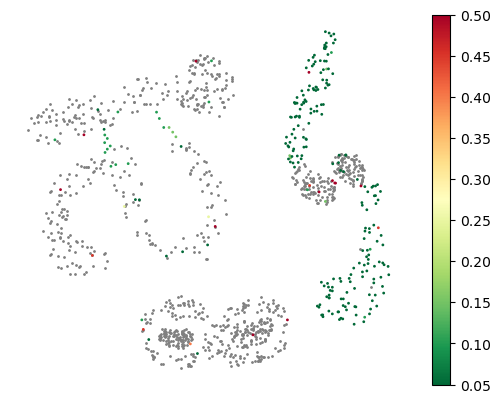

In [46]:
rate, mask_rate = "0.30", "0.10"
tmp = np.zeros_like(ground_truth[:,2])
for i in range(10):
    filename = "results/result-synthetic-data-missing-stable-dynamic-{}-{}.txt".format(rate, i)
    pred_labels = pd.read_table(filename, names=["group"]).values.flatten()
    tmp += compute_error(ground_truth[:,2], pred_labels)

tmp /= 10

print(np.unique(tmp, return_counts=True))

sizes = copy.deepcopy(tmp)
tmp[tmp>0] = 1

draw_results(tmp, sizes)

In [146]:
np.array((8+10, 0, 20+22, 17, 0, 0, 0)) / 24

array([0.75      , 0.        , 1.75      , 0.70833333, 0.        ,
       0.        , 0.        ])

# Plot defective data

In [88]:
data = np.loadtxt("defective_data/synthetic-data-clean-0.30-1.txt", delimiter=",")

In [89]:
fs, locs = data[:,:5], data[:,-2:]

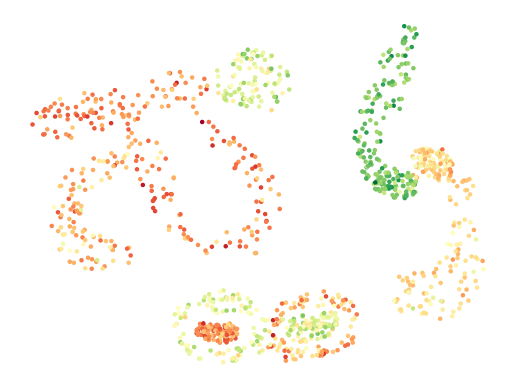

In [90]:
plt.axis("off")
plt.scatter(locs[:,0], locs[:,1], c=fs[:,0], cmap="RdYlGn", s=5)
plt.colorbar
plt.savefig("figures/feature-clean.png")

In [36]:
data = np.loadtxt("defective_data/synthetic-data-extreme-0.30-1.txt", delimiter=",")

In [30]:
data.shape

(1213, 37)

In [37]:
fs, locs = data[:,:5], data[:,-2:]

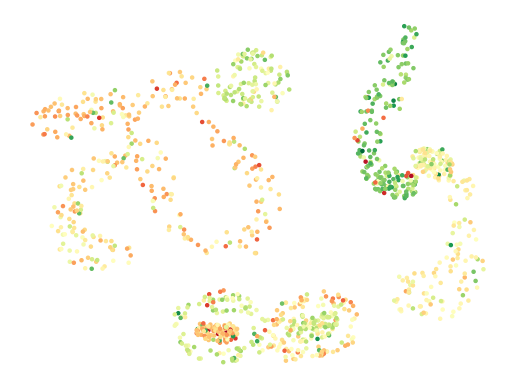

In [71]:
plt.axis("off")
plt.scatter(locs[:,0], locs[:,1], c=fs[:,0], cmap="RdYlGn", s=5)
plt.colorbar
plt.savefig("figures/feature-info.png")

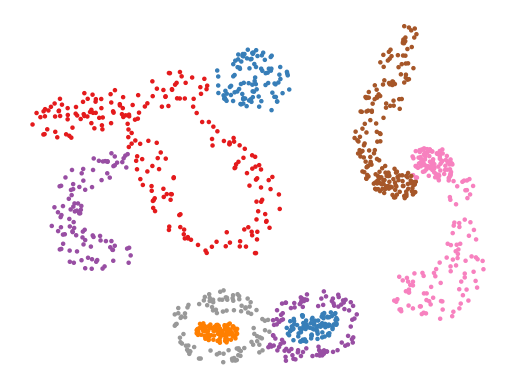

In [72]:
plt.axis("off")
plt.scatter(locs[:,0], locs[:,1], c=ground_truth[:,-1], s=5, cmap="Set1")
plt.savefig("figures/spatial-info.png")

In [22]:
labels = ground_truth[:,-1]

In [21]:
np.unique(ground_truth[:,-1])

array([1., 2., 3., 4., 5., 6., 7.])

In [39]:
means = np.zeros_like(labels)
for i in range(1,8):
    means[labels == i] = np.mean(fs[labels == i,0])

In [40]:
means

array([-1.83714923, -1.83714923, -1.83714923, ..., -1.83714923,
       -1.83714923, -1.83714923])

In [83]:
diff = np.abs(fs[:,0] - means)

(array([336., 307., 198., 151.,  74.,  43.,  26.,  19.,  14.,   7.,  11.,
          4.,   5.,   6.,   3.,   2.,   3.,   0.,   2.,   2.]),
 array([1.83025786e-03, 5.80892526e-01, 1.15995479e+00, 1.73901706e+00,
        2.31807933e+00, 2.89714160e+00, 3.47620386e+00, 4.05526613e+00,
        4.63432840e+00, 5.21339067e+00, 5.79245294e+00, 6.37151520e+00,
        6.95057747e+00, 7.52963974e+00, 8.10870201e+00, 8.68776428e+00,
        9.26682654e+00, 9.84588881e+00, 1.04249511e+01, 1.10040133e+01,
        1.15830756e+01]),
 <BarContainer object of 20 artists>)

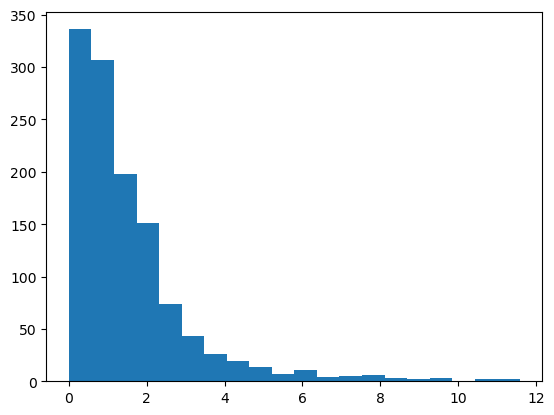

In [67]:
plt.hist(diff, bins=20)

In [84]:
detect = np.zeros_like(diff)

In [85]:
detect[diff > 2.5] = 1

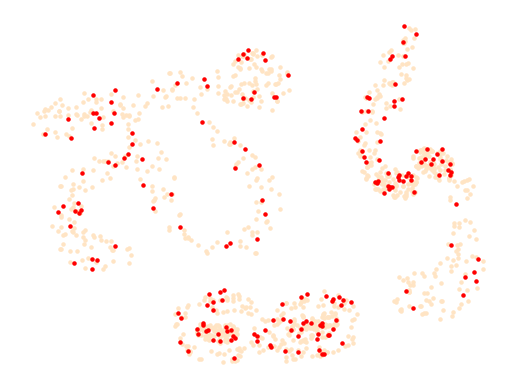

In [86]:
plt.axis("off")
plt.scatter(locs[detect==0,0], locs[detect==0,1], c="bisque", s=5)
plt.scatter(locs[detect==1,0], locs[detect==1,1], c="red", s=5)
plt.savefig("figures/detect-phase-1.png")

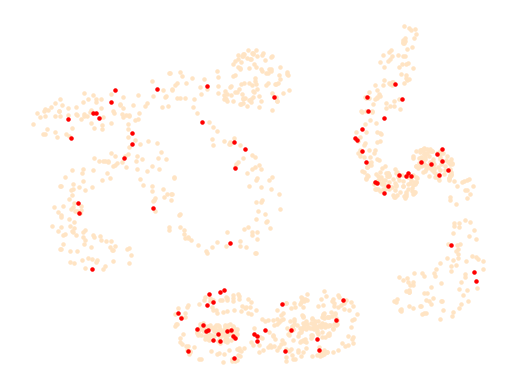

In [78]:
plt.axis("off")
plt.scatter(locs[detect==0,0], locs[detect==0,1], c="bisque", s=5)
plt.scatter(locs[detect==1,0], locs[detect==1,1], c="red", s=5)
plt.savefig("figures/detect-phase-2.png")